<a href="https://colab.research.google.com/github/JulianSudiyanto/Tugas-Besar-PASD---Kelompok-Lima-Watt/blob/amel/Model_Data_Restaurant_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv("/content/Clean_Data_Restaurant_Final.csv")
df.head()

,Unnamed: 0,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Bulan,Monthly Visit Count,Last Visit Date,Churn,Monthly Spending (IDR)
0,0,ORD_705844,CUST_092,Side Dishes,Side Salad,20795,1,20795,2023-12-21,Credit Card,2023-12,1,2023-12-21,False,20795
1,1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,5860,3,17580,2023-05-19,Digital Wallet,2023-05,1,2023-05-19,False,17580
2,2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,10390,4,41560,2023-09-27,Credit Card,2023-09,2,2023-09-27,True,95761
3,3,ORD_630508,CUST_075,Drinks,Lemonade,16964,2,33928,2022-08-09,Credit Card,2022-08,2,2022-08-09,True,147303
4,4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,16284,4,65136,2022-05-15,Cash,2022-05,1,2022-05-15,True,65136


In [ ]:
# Cek Duplikat dan Missing Value
print("Jumlah duplikat:", df.duplicated().sum())
print("Jumlah missing value:")
print(df.isnull().sum())

Jumlah duplikat: 0
Jumlah missing value:
Unnamed: 0                0
Order ID                  0
Customer ID               0
Category                  0
Item                      0
Price                     0
Quantity                  0
Order Total               0
Order Date                0
Payment Method            0
Bulan                     0
Monthly Visit Count       0
Last Visit Date           0
Churn                     0
Monthly Spending (IDR)    0
dtype: int64


Tidak ada missing value dan data yang duplikat.

In [ ]:
# Hapus kolom yang tidak dipakai
drop_cols = ['Unnamed: 0', 'Order ID', 'Order Date', 'Last Visit Date', 'Item', 'Customer ID']
df.drop(columns=drop_cols, inplace=True)
df

,Category,Price,Quantity,Order Total,Payment Method,Bulan,Monthly Visit Count,Churn,Monthly Spending (IDR)
0,Side Dishes,20795,1,20795,Credit Card,2023-12,1,False,20795
1,Side Dishes,5860,3,17580,Digital Wallet,2023-05,1,False,17580
2,Main Dishes,10390,4,41560,Credit Card,2023-09,2,True,95761
3,Drinks,16964,2,33928,Credit Card,2022-08,2,True,147303
4,Main Dishes,16284,4,65136,Cash,2022-05,1,True,65136
...,...,...,...,...,...,...,...,...,...
195,Starters,16411,3,49233,Digital Wallet,2022-09,1,True,49233
196,Side Dishes,7911,2,15822,Cash,2022-11,1,True,15822
197,Drinks,6734,2,13468,Credit Card,2023-05,1,True,13468
198,Desserts,23227,4,92908,Digital Wallet,2022-09,1,False,92908


In [ ]:
# Ekstrak nomor bulan dari tanggal di kolom Bulan
df['Bulan'] = df['Bulan'].str.extract(r'-(\d{2})').astype(int)
df

,Category,Price,Quantity,Order Total,Payment Method,Bulan,Monthly Visit Count,Churn,Monthly Spending (IDR)
0,Side Dishes,20795,1,20795,Credit Card,12,1,False,20795
1,Side Dishes,5860,3,17580,Digital Wallet,5,1,False,17580
2,Main Dishes,10390,4,41560,Credit Card,9,2,True,95761
3,Drinks,16964,2,33928,Credit Card,8,2,True,147303
4,Main Dishes,16284,4,65136,Cash,5,1,True,65136
...,...,...,...,...,...,...,...,...,...
195,Starters,16411,3,49233,Digital Wallet,9,1,True,49233
196,Side Dishes,7911,2,15822,Cash,11,1,True,15822
197,Drinks,6734,2,13468,Credit Card,5,1,True,13468
198,Desserts,23227,4,92908,Digital Wallet,9,1,False,92908


In [ ]:
# Ubah bulan jadi per quarter
df['Bulan'] = np.ceil(df['Bulan'] / 3).astype(int)
df.rename(columns={'Bulan': 'Quarter'}, inplace=True) # rename kolom bulan
df

,Category,Price,Quantity,Order Total,Payment Method,Quarter,Monthly Visit Count,Churn,Monthly Spending (IDR)
0,Side Dishes,20795,1,20795,Credit Card,4,1,False,20795
1,Side Dishes,5860,3,17580,Digital Wallet,2,1,False,17580
2,Main Dishes,10390,4,41560,Credit Card,3,2,True,95761
3,Drinks,16964,2,33928,Credit Card,3,2,True,147303
4,Main Dishes,16284,4,65136,Cash,2,1,True,65136
...,...,...,...,...,...,...,...,...,...
195,Starters,16411,3,49233,Digital Wallet,3,1,True,49233
196,Side Dishes,7911,2,15822,Cash,4,1,True,15822
197,Drinks,6734,2,13468,Credit Card,2,1,True,13468
198,Desserts,23227,4,92908,Digital Wallet,3,1,False,92908


In [ ]:
# Label Encoding
encoders = {}

for col in ['Category', 'Payment Method', 'Churn']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Simpan encoder untuk tiap kolom

df

,Category,Price,Quantity,Order Total,Payment Method,Quarter,Monthly Visit Count,Churn,Monthly Spending (IDR)
0,3,20795,1,20795,1,4,1,0,20795
1,3,5860,3,17580,2,2,1,0,17580
2,2,10390,4,41560,1,3,2,1,95761
3,1,16964,2,33928,1,3,2,1,147303
4,2,16284,4,65136,0,2,1,1,65136
...,...,...,...,...,...,...,...,...,...
195,4,16411,3,49233,2,3,1,1,49233
196,3,7911,2,15822,0,4,1,1,15822
197,1,6734,2,13468,1,2,1,1,13468
198,0,23227,4,92908,2,3,1,0,92908


Dataset yang dianalisis berisi 200 entri transaksi dari sebuah restoran. Setiap baris merepresentasikan satu transaksi, yang mencakup beberapa informasi penting seperti:

* Kategori menu yang dipesan (misalnya Main Dishes, Desserts)

* Harga, jumlah, dan total pemesanan

* Metode pembayaran (Cash, Digital Wallet, Credit Card)

* Jumlah kunjungan pelanggan per bulan

* Total pengeluaran bulanan pelanggan

* Indikator apakah pelanggan tersebut churn atau tidak

Setelah melalui tahap preprocessing nya, beberapa kolom yang tidak relevan untuk di proses akan dihapus (seperti Unnamed: 0, Order ID, Order Date, Last Visit Date, Item, Customer ID), serta data kategorikal dikonversi menjadi numerik menggunakan encoding.

In [ ]:
# Hitung distribusi target
data_target = df['Churn'].value_counts()
data_target

,count
Churn,
1,167
0,33


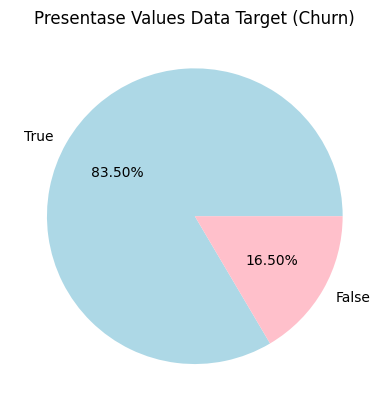

In [ ]:
# Visualisasikan ke pie chart
colors = ['lightblue', 'pink']
plt.pie(
    data_target,
    autopct='%.2f%%',
    labels=['True', 'False'],
    colors=colors
)

# Judul pie chart
plt.title('Presentase Values Data Target (Churn)')

plt.show()

Data target tidak seimbang.

Hasil visualisasi distribusi variabel target menunjukkan bahwa sebanyak 167 pelanggan (83.5%) merupakan churn, sementara hanya 33 pelanggan (16.5%) yang tidak churn.

data target yang tidak seimbang ini yang biasanya menjadi permasalahan umum dalam bisnis ritel atau restoran, di mana tingkat retensi pelanggan cenderung rendah, dan sebagian besar pelanggan tidak kembali setelah kunjungan awal.

In [ ]:
# Salin data asli
data = df.copy()

# Pisahkan fitur dan target
X = data.drop(columns='Churn')
y = data['Churn'].astype(int)

In [ ]:
# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Mencari model terbaik menggunakan Grid Search
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    n_jobs=-1,
    verbose=1,
    scoring='f1_weighted'
)

# Jalankan grid search
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("\nBest Score:", grid_search.best_score_)

# Evaluasi model terbaik di test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Score: 0.7982628803159271

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      0.97      0.89        33

    accuracy                           0.80        40
   macro avg       0.41      0.48      0.44        40
weighted avg       0.68      0.80      0.73        40



Berdasarkan data dan hasil model, terdapat beberapa kesimpulan penting:

* Fitur paling berpengaruh terhadap churn kemungkinan besar adalah jumlah kunjungan per bulan dan total pengeluaran. Pelanggan yang hanya datang sekali dan menghabiskan sedikit cenderung tidak kembali.

* Kategori makanan dan metode pembayaran juga berpotensi menjadi indikator preferensi pelanggan, meskipun dampaknya lebih kecil dibandingkan perilaku kunjungan dan pembelian.

* Ketidakseimbangan kelas antara churn dan tidak churn menunjukkan bahwa sebagian besar pelanggan hanya melakukan satu kali pembelian.

In [ ]:
import joblib

# Simpan model dan encoder
joblib.dump({
    'model': best_model,
    'encoders': encoders
}, 'rf_churn_model.pkl')

['rf_churn_model.pkl']

In [ ]:
from google.colab import files
files.download('rf_churn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>